In [40]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# First, reproduce the BKT transition--now J > J_c, so vortices are exponentially unlikely
# This was generated on a 50x50 lattice!!
dataset = np.loadtxt('J_1.5.txt')

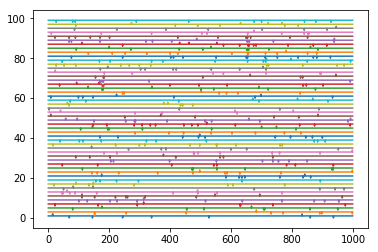

In [135]:
# Here, we plot the winding number at every timestep (i.e. after every spin flip)
for col in xrange(len(dataset[0])):
    plt.plot(range(len(dataset[::2500, col])), dataset[::2500, col] + 2 * col)
plt.show()

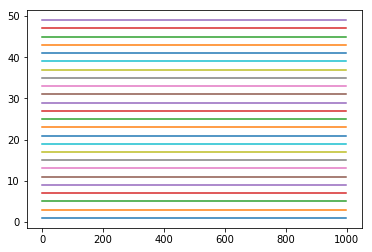

In [136]:
# Let's see if not forcing spin flips gets us to the ground state faster
dataset8 = np.loadtxt('J_1.5_add_angle_constraint_no_forced_flip.txt')
for col in xrange(len(dataset8[0])-25):
    plt.plot(range(len(dataset8[::2500, col])), dataset8[::2500, col] + 2 * col)
plt.show()

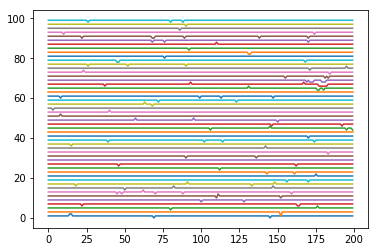

In [44]:
# Here, we plot it after each MC step (L^2 spin flips) and for a reduced number of MC steps, 
# showing that the winding number does not change a great deal
for col in xrange(len(dataset[0])):
    plt.plot(range(len(dataset[0:500000:2500, col])), dataset[0:500000:2500, col] + 2 * col)
plt.show()

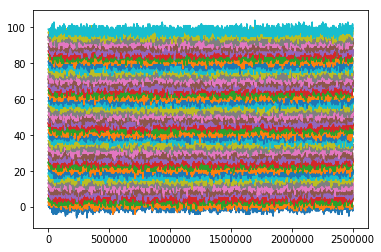

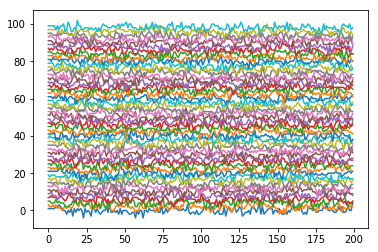

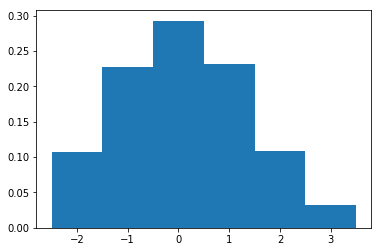

In [141]:
# Now, do the same thing on the other side of the transition, with J < J_c (high temperature)
dataset1 = np.loadtxt('J_0.7.txt')

for col in xrange(len(dataset1[0])):
    plt.plot(range(len(dataset1[:, col])), dataset1[:, col] + 2 * col)
plt.show()

for col in xrange(len(dataset1[0])):
    plt.plot(range(len(dataset1[0:500000:2500, col])), dataset1[0:500000:2500, col] + 2 * col)
plt.show()

datasetT = np.transpose(dataset1)
cont_bkt_high_temp = datasetT[0]
for row in datasetT[1:]:
    cont_bkt_high_temp = np.append(cont_bkt_high_temp, row)
plt.hist(cont_bkt_high_temp, bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
plt.show()

In [142]:
datasetT = np.transpose(dataset1)
cont_bkt_high_temp = datasetT[0]
for row in datasetT[1:]:
    cont_bkt_high_temp = np.append(cont_bkt_high_temp, row)
plt.hist(cont_bkt_high_temp, bins=[-3.5,-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
plt.show()

Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__' ignored


KeyboardInterrupt: 

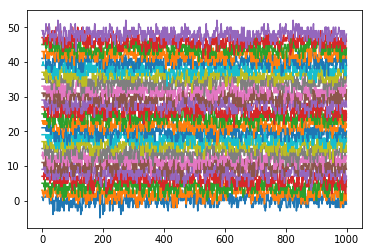

In [140]:
dataset9 = np.loadtxt('J_0.7_reduced_angle_constraint_no_forced_flip.txt')
for col in xrange(len(dataset9[0])-25):
    plt.plot(range(len(dataset9[::2500, col])), dataset9[::2500, col] + 2 * col)
plt.show()

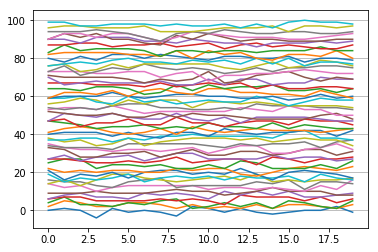

In [46]:
# Let's look at an even smaller region (skip the bit at the beginning when the initial setup unwinds)
# Do the +/-2 changes correspond to 4pi vortices? (e.g. bottom line at t=3)? This is at L^2 spacing.
c=50000
for col in xrange(len(dataset1[0])):
    plt.plot(range(len(dataset1[c:50000 + c:2500, col])), dataset1[c:50000 + c:2500, col] + 2 * col)
plt.grid(True, axis='y')
plt.show()

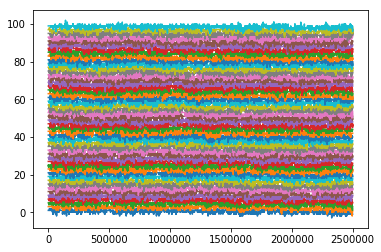

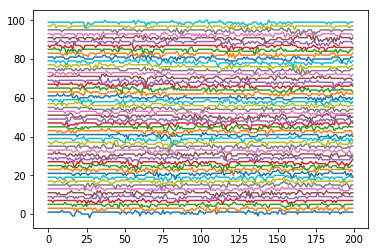

In [47]:
# Starting from J=1.0, where we are just below the J_c, we expect to find some 4pi vortices, but not many
# Will slowly increasing K result in the expulsion of the 2pi vortices, such that only the 4pi ones remain?

# I guess first we should check that we do have some 4pi vortices at J=1.0, K=0 first!
dataset2 = np.loadtxt('J_1.0.txt')

for col in xrange(len(dataset2[0])):
    plt.plot(range(len(dataset2[:, col])), dataset2[:, col] + 2 * col)
plt.show()

for col in xrange(len(dataset2[0])):
    plt.plot(range(len(dataset2[0:500000:2500, col])), dataset2[0:500000:2500, col] + 2 * col)
plt.show()

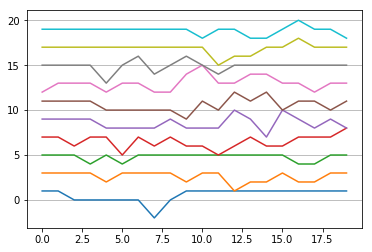

In [48]:
# Let's zoom in again... This looks much more calm than J=0.7, so that's nice. Also it does look like
# there are some 4pi vortices, right (the big changes...) Again, this is at L^2 spacing, so hopefully
# this timescale isn't too large that this could be considered a lucky sum of 2pi vortices?
c=50000
for col in xrange(len(dataset2[0]) - 40):
    plt.plot(range(len(dataset2[c:50000 + c:2500, col])), dataset2[c:50000 + c:2500, col] + 2 * col)
plt.grid(True, axis='y')
plt.show()

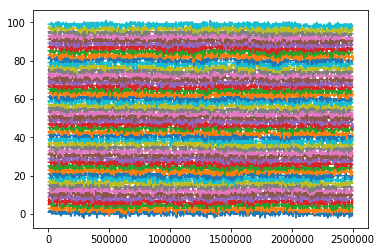

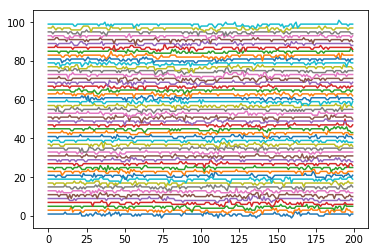

In [53]:
# Okay, now it's time to start slowly increasing K... Let's try K = [0.1, 0.15, 0.2]. Hopefully the 2pi vortices
# will slowly disappear! 

# First for K=0.1
dataset3 = np.loadtxt('J_1.0_K_0.1.txt')

for col in xrange(len(dataset3[0])):
    plt.plot(range(len(dataset3[:, col])), dataset3[:, col] + 2 * col)
plt.show()

for col in xrange(len(dataset3[0])):
    plt.plot(range(len(dataset3[0:500000:2500, col])), dataset3[0:500000:2500, col] + 2 * col)
plt.show()

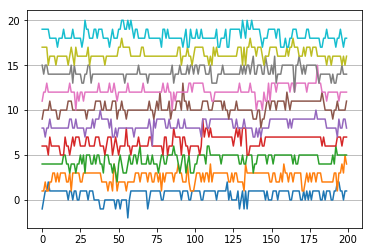

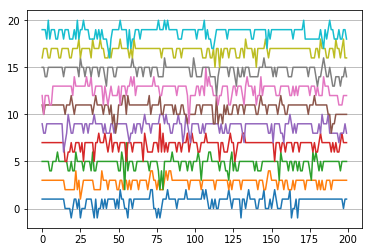

In [54]:
# Zoom in again
c=500000
for col in xrange(len(dataset3[0]) - 40):
    plt.plot(range(len(dataset3[c:500000 + c:2500, col])), dataset3[c:500000 + c:2500, col] + 2 * col)
plt.grid(True, axis='y')
plt.show()

# Side-by-side comparison with the K=0 case....
c=500000
for col in xrange(len(dataset2[0]) - 40):
    plt.plot(range(len(dataset2[c:500000 + c:2500, col])), dataset2[c:500000 + c:2500, col] + 2 * col)
plt.grid(True, axis='y')
plt.show()

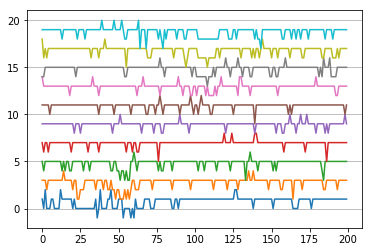

In [56]:
# Visually, I would say I can't tell the difference between these two plots. Let's try K=2
dataset4 = np.loadtxt('J_1.0_K_0.2.txt')
c=500000
for col in xrange(len(dataset4[0]) - 40):
    plt.plot(range(len(dataset4[c:500000 + c:2500, col])), dataset4[c:500000 + c:2500, col] + 2 * col)
plt.grid(True, axis='y')
plt.show()

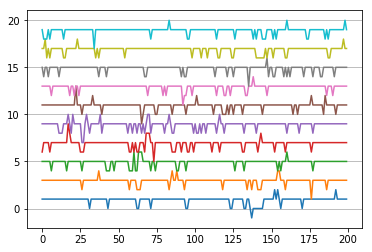

In [57]:
# There's definitely less going on here, but we still have lots of 2pi changes... Let's try K=0.3...
dataset5 = np.loadtxt('J_1.0_K_0.3.txt')
c=500000
for col in xrange(len(dataset5[0]) - 40):
    plt.plot(range(len(dataset5[c:500000 + c:2500, col])), dataset5[c:500000 + c:2500, col] + 2 * col)
plt.grid(True, axis='y')
plt.show()

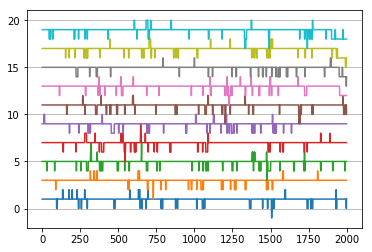

In [59]:
# Again, we still have 2pi vortices... K=0.4...
dataset6 = np.loadtxt('J_1.0_K_0.4.txt')
c=500000
for col in xrange(len(dataset6[0]) - 40):
    plt.plot(range(len(dataset6[c:500000 + c:250, col])), dataset6[c:500000 + c:250, col] + 2 * col)
plt.grid(True, axis='y')
plt.show()

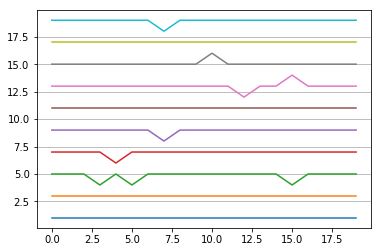

In [60]:
# Regardless of sampling range, there are clearly 2pi vortices flying around, right?
c=500000
for col in xrange(len(dataset6[0]) - 40):
    plt.plot(range(len(dataset6[c:500000 + c:25000, col])), dataset6[c:500000 + c:25000, col] + 2 * col)
plt.grid(True, axis='y')
plt.show()

In [103]:
# Hmmmmm... I'm not sure if there's a point to continuing here. Maybe it would make sense to compare histograms?
# I don't trust myself with these visual tests

# First, try making the K=0, J < J_c plot--here we expect a peak at nu=1 and equal lesser frequencies for 0 and 2

# First, transpose the array so rows correspond to rows in the plots above
dataset7 = np.loadtxt('J_1.0_with_angle_constraint.txt')

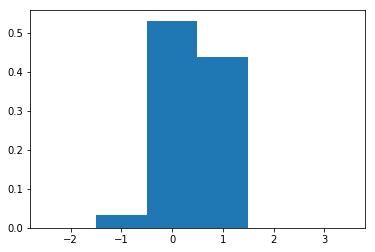

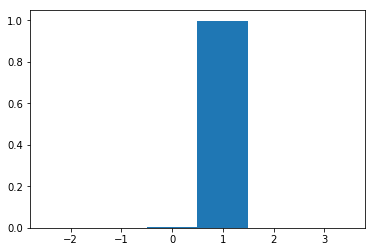

In [110]:
dataset7T = np.transpose(dataset7[50000:, :])
cont_dataset7 = dataset7T[0]

# This might take a while to run :(
for row in dataset7T[1:]:
    cont_dataset7 = np.append(cont_dataset7, row)
plt.hist(cont_dataset7, bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
plt.show()

dataset7T = np.transpose(dataset7[:50000, :])
cont_dataset7 = dataset7T[0]

# This might take a while to run :(
for row in dataset7T[1:]:
    cont_dataset7 = np.append(cont_dataset7, row)
plt.hist(cont_dataset7, bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
plt.show()

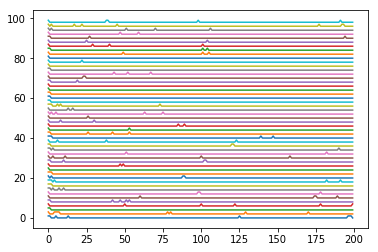

In [101]:
# Here, we plot it after L spin flips and for a reduced number of MC steps, 
# showing that the winding number does not change a great deal
for col in xrange(len(dataset7[0])):
    plt.plot(range(len(dataset7[0:500000:2500, col])), dataset7[0:500000:2500, col] + 2 * col)
plt.show()

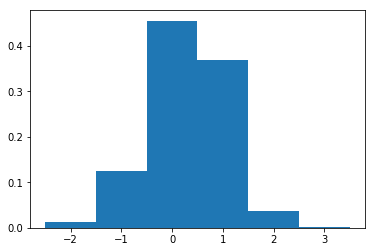

In [102]:
dataset7T = np.transpose(dataset2[:, :])
cont_dataset7 = dataset7T[0]

# This might take a while to run :(
for row in dataset7T[1:]:
    cont_dataset7 = np.append(cont_dataset7, row)
plt.hist(cont_dataset7, bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
plt.show()

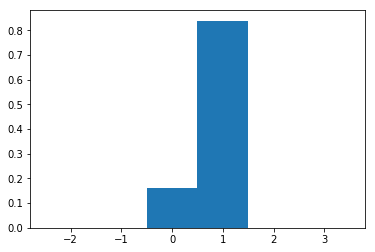

In [121]:
dataset7T = np.transpose(dataset7[:500000, :])
cont_dataset7 = dataset7T[0]

# This might take a while to run :(
for row in dataset7T[1:]:
    cont_dataset7 = np.append(cont_dataset7, row)
plt.hist(cont_dataset7, bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
plt.show()